In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../normalized_character_datasets/normalized_dataset_4.csv")
# df = pd.read_csv("../flattened_window_datasets/windowed_dataset_1.csv")

print("Dataset Overview")
print(df.shape)
print(df.dtypes)

# Nulls
print("\n🕳️ Missing Values:")
print(df.isnull().sum())

Dataset Overview
(21184, 35)
timer                      int64
fight_result              object
has_round_started           bool
is_round_over               bool
player1_id                 int64
p1_health                  int64
p1_x                       int64
p1_y                       int64
p1_jumping                  bool
p1_crouching                bool
p1_in_move                  bool
p1_move_id                 int64
player1_buttons_up          bool
player1_buttons_down        bool
player1_buttons_right       bool
player1_buttons_left        bool
player1_buttons_select      bool
player1_buttons_start       bool
player1_buttons_y           bool
player1_buttons_b           bool
player1_buttons_x           bool
player1_buttons_a           bool
player1_buttons_l           bool
player1_buttons_r           bool
player2_id                 int64
p2_health                  int64
p2_x                       int64
p2_y                       int64
p2_jumping                  bool
p2_crouching  

In [2]:

# Constant columns (not useful)
print("\n⚠️ Columns with Constant Values:")
print([col for col in df.columns if df[col].nunique() == 1])


⚠️ Columns with Constant Values:
['player1_id']


In [3]:
# Boolean column distribution
bool_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'bool']
print("\n📊 Boolean Column Distributions:")
for col in bool_cols:
    print(f"{col}:\n{df[col].value_counts(normalize=True)}\n")


📊 Boolean Column Distributions:
has_round_started:
has_round_started
True     0.9603
False    0.0397
Name: proportion, dtype: float64

is_round_over:
is_round_over
False    0.977389
True     0.022611
Name: proportion, dtype: float64

p1_jumping:
p1_jumping
False    0.9071
True     0.0929
Name: proportion, dtype: float64

p1_crouching:
p1_crouching
False    0.899783
True     0.100217
Name: proportion, dtype: float64

p1_in_move:
p1_in_move
False    0.621271
True     0.378729
Name: proportion, dtype: float64

player1_buttons_up:
player1_buttons_up
False    0.916918
True     0.083082
Name: proportion, dtype: float64

player1_buttons_down:
player1_buttons_down
False    0.834687
True     0.165313
Name: proportion, dtype: float64

player1_buttons_right:
player1_buttons_right
False    0.537292
True     0.462708
Name: proportion, dtype: float64

player1_buttons_left:
player1_buttons_left
False    0.656911
True     0.343089
Name: proportion, dtype: float64

player1_buttons_select:
player1_butt

In [4]:

# Numerical columns summary
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\n📈 Numeric Summary Stats:")
print(df[num_cols].describe())



📈 Numeric Summary Stats:
              timer  player1_id     p1_health          p1_x          p1_y  \
count  21184.000000     21184.0  21184.000000  21184.000000  21184.000000   
mean     107.120468         4.0     93.332940    221.663567    187.083648   
std       33.773903         0.0     58.549646    110.271595     16.160100   
min        0.000000         4.0      0.000000     15.000000      0.000000   
25%       84.000000         4.0     40.000000    139.000000    192.000000   
50%      114.000000         4.0     94.000000    217.000000    192.000000   
75%      135.000000         4.0    142.000000    308.000000    192.000000   
max      153.000000         4.0    255.000000   1919.000000    217.000000   

         p1_move_id    player2_id     p2_health          p2_x          p2_y  \
count  2.118400e+04  21184.000000  21184.000000  21184.000000  21184.000000   
mean   6.242742e+06      4.038095    109.904598    272.813208    182.779692   
std    1.403124e+07      2.303571     62.23

In [5]:

# Check correlation with output buttons
button_cols = [col for col in df.columns if 'player1_buttons_' in col]  # change if analyzing P2
corr = df[num_cols.union(bool_cols)].corrwith(df[button_cols].sum(axis=1))
print("\n🔗 Correlation of Features with Button Press Sum (P1):")
print(corr.sort_values(ascending=False))




🔗 Correlation of Features with Button Press Sum (P1):
player1_buttons_y         0.578007
player1_buttons_down      0.341810
player1_buttons_up        0.284214
player1_buttons_a         0.278951
p1_in_move                0.270081
p1_crouching              0.238393
player1_buttons_b         0.187921
player1_buttons_l         0.173535
player2_id                0.171598
player1_buttons_right     0.149904
p1_move_id                0.092511
p2_move_id                0.060699
p1_jumping                0.052811
p2_crouching              0.047097
has_round_started         0.045123
diff_x                    0.032087
player1_buttons_select    0.018920
player1_buttons_r         0.018920
p2_y                      0.014625
p2_jumping                0.007343
is_round_over             0.004361
player1_buttons_x        -0.001021
diff_health              -0.013556
player1_buttons_start    -0.026430
p1_y                     -0.032561
diff_y                   -0.035926
p2_in_move               -0.037649


c:\Users\Abdullah Mansoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Abdullah Mansoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


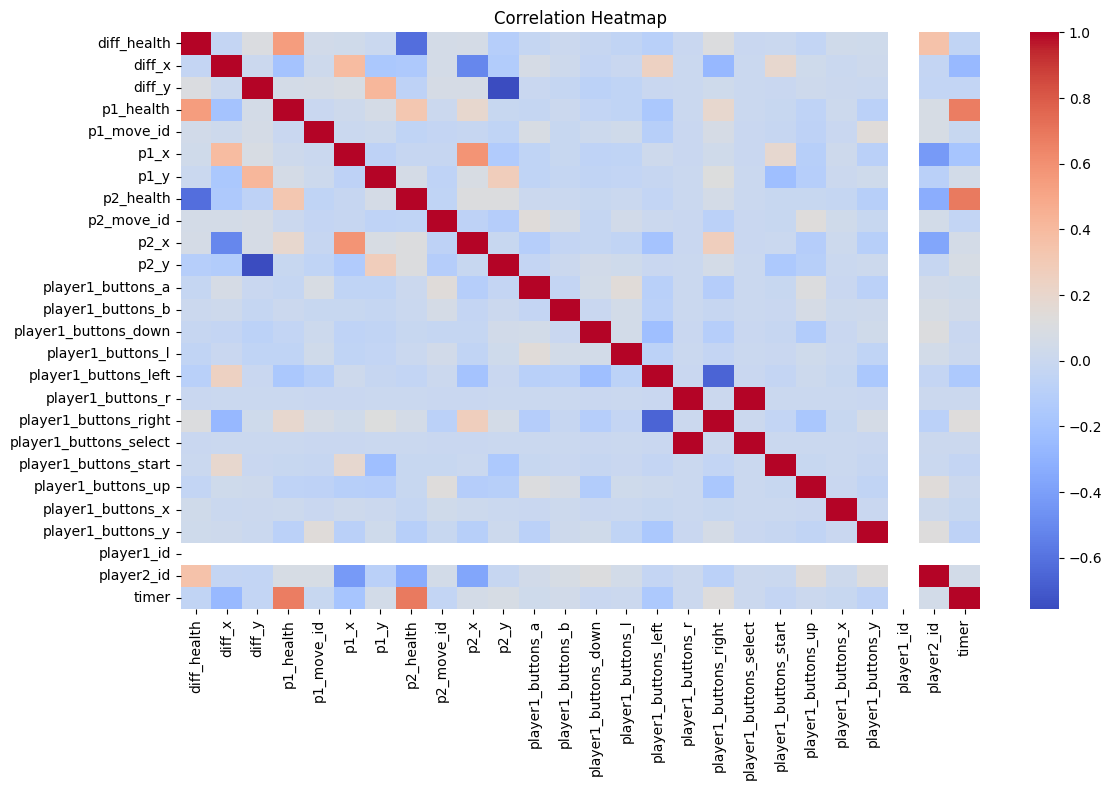

In [6]:

# Plot heatmap of all numeric correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols.union(button_cols)].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [7]:

# Optional: Check imbalance in button outputs
button_activity = df[button_cols].sum()
print("\n🕹️ Button Press Frequencies:")
print(button_activity.sort_values(ascending=False))



🕹️ Button Press Frequencies:
player1_buttons_right     9802
player1_buttons_left      7268
player1_buttons_y         4631
player1_buttons_down      3502
player1_buttons_up        1760
player1_buttons_a         1339
player1_buttons_b          394
player1_buttons_l          264
player1_buttons_start       38
player1_buttons_x            6
player1_buttons_select       1
player1_buttons_r            1
dtype: int64


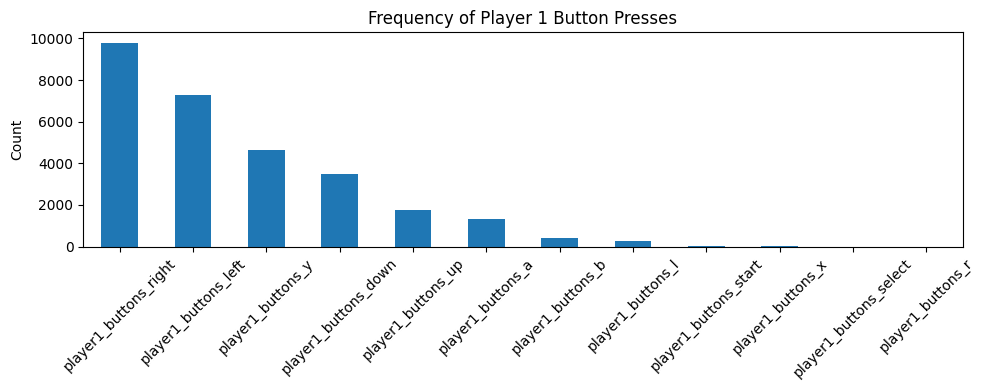

In [8]:

# Plot button activity
plt.figure(figsize=(10, 4))
button_activity.sort_values(ascending=False).plot(kind='bar')
plt.title("Frequency of Player 1 Button Presses")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()